In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scripts.create_graph import *

#### Load the tweets into a dataframe and create a retweet network from the tweets.

In [25]:

fname_tweets ="data/tweets_coronavirus.csv"

#df is a dataframe with all of the tweets
df = pd.read_csv(fname_tweets)

#  create a retweet network from the tweets
G = retweet_network_from_tweets(df)

went through 97500 tweets, found 84058 retweets, 79956 retweet edges
Retweet network has 71319 nodes and 79956 edges


In [26]:
nv = G.number_of_nodes()
ne = G.number_of_edges()
print(f"Network has {nv} nodes and {ne} edges")


Network has 71319 nodes and 79956 edges


#### five  nodes  with  the  highest  out-degree  and  the  value  of  their  out-degree



In [28]:
Din = G.in_degree()
Dout = G.out_degree()

df_degree = pd.DataFrame({'screen_name':[x[0] for x in Dout],
                          'in_degree':[x[1] for x in Din],
                          'out_degree':[x[1] for x in Dout] })

df_degree[['screen_name','out_degree']].sort_values(by=['out_degree'],ascending = False).head(n=5)


,screen_name,out_degree
8,OH_mes2,3792
61,spectatorindex,3392
80,Pog_llins,1983
138,KoreanUpdates,1401
114,AzharAliLeghari,1261


#### the five nodes with the highest in-degree and the value of their in-degree



In [29]:
df_degree[['screen_name','in_degree']].sort_values(by=['in_degree'],ascending = False).head(n=5)




,screen_name,in_degree
6420,JClintEastwood,53
47232,BaronianConsult,39
40915,sadiejelle,32
49096,My_Under37,30
531,4Tchat,30


Out-degree is a better measure, because it is a retweet network, out-degree measures how many times someone's posts are retweeted. The higher the out-degree is, the more influence this person has. But the in-degree means how many times this person retweets other's post, which does not show the influence, maybe shows the activity. 

OH_mes2 is the most influential person in the retweet network. 
OH_mes2 was a translator for girl groups but did some translations for pop news. He/She only translates the headlines and news subject which leads to many misunderstandings. People will discuss his/her tweets, and that's the reason he/she is so popular. 

#### Sample 2,000 tweets from the tweets dataframe and create a retweet network from the sample.  Draw the retweet network, but make the node size proportional to the out-degree.



went through 2000 tweets, found 1730 retweets, 1726 retweet edges
Retweet network has 2513 nodes and 1726 edges


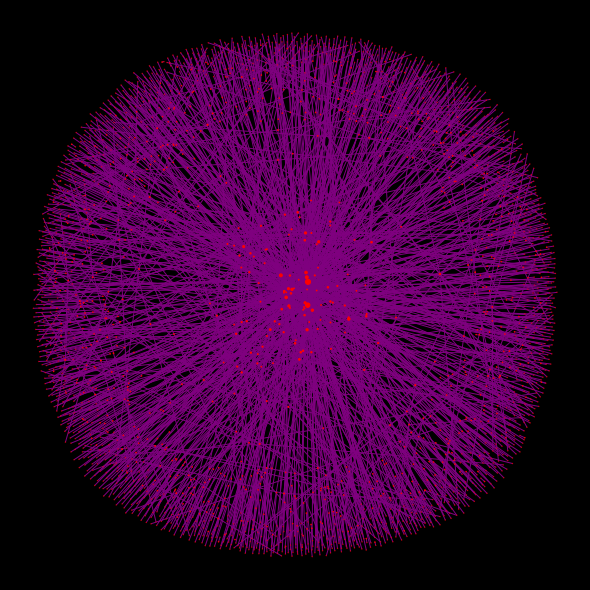

In [42]:
ntweets = 2000
df_sample = df.sample(n=ntweets)
Gsample = retweet_network_from_tweets(df_sample)

pos = nx.spring_layout(Gsample)

node_color = 'red'
edge_color = 'purple'
background_color = 'black'
edge_width = 1
size_min = 0.1
size_max = 1000

#define parameters for linear interpolation of node size from out-degree
dmax = df_degree.out_degree.max()
dmin = df_degree.out_degree.min()
slope = (size_max-size_min)/(dmax-dmin)
intercept = size_min-slope*dmin 

#Go through each node and calculate its size
node_size = [Gsample.out_degree(node)*slope+intercept  for node in Gsample.nodes()]

    
    
    
fig = plt.figure(figsize=(8,8))
nx.draw(Gsample.to_undirected(), pos, node_color = node_color, width= edge_width,edge_color=edge_color,node_size=node_size)
fig.set_facecolor(background_color)

## Follower Network

We are going to look at the follower network of all users followed by YaleSOM.  The nodes in the network are Twitter users followed by YaleSOM and the edges represent a following relationship.  For instance, if @KimKardashian follows @kanyewest, this creates a directed edge pointing from @kanyewest to @KimKardashian

####  Load the follower network into a networkx object.

The follower network is in the file *data/data/friends_network_YaleSOM.pickle*.

In [4]:
fname_following = 'data/friends_network_YaleSOM.pickle'
G = nx.read_gpickle(fname_following)


In [4]:
nv = G.number_of_nodes()
ne = G.number_of_edges()
print(f"Network has {nv} nodes and {ne} edges")


Network has 235 nodes and 4922 edges


In [5]:
Din = G.in_degree()
Dout = G.out_degree()
df_degree_2 = pd.DataFrame({'screen_name':[x[0] for x in Dout],
                          'in_degree':[x[1] for x in Din],
                          'out_degree':[x[1] for x in Dout] })

df_degree_2[['screen_name','out_degree']].sort_values(by=['out_degree'],ascending = False).head(n=5)

,screen_name,out_degree
42,YaleSOM,152
35,Yale,138
29,yaledailynews,87
30,yalealumnimag,76
37,YaleAlumni,72


In [6]:

df_degree_2[['screen_name','in_degree']].sort_values(by=['in_degree'],ascending = False).head(n=5)


,screen_name,in_degree
42,YaleSOM,234
75,YaleInsights,103
82,YaleSOMCases,78
93,JeffSonnenfeld,71
18,Yale_OIA,69


#### Make a barplot of the out-degree for the nodes with out-degree greater than or equal to 50.

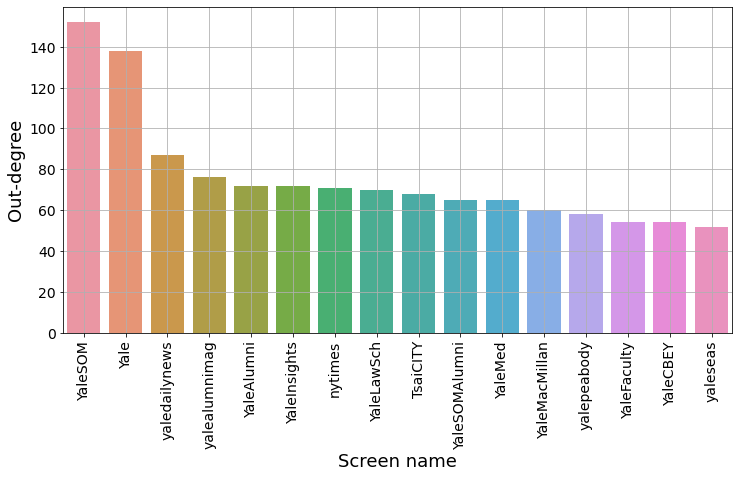

In [10]:
#Your answer here

dout_min = 50  #minimum out-degree value to be included in plot
df_plot = df_degree_2[df_degree_2.out_degree>=dout_min].sort_values(by=['out_degree'],ascending=False)

fig = plt.figure(figsize = (12,6))
ax = sns.barplot(data=df_plot, x='screen_name', y="out_degree")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Out-degree',fontsize = 18)
plt.xlabel('Screen name',fontsize = 18)
plt.grid()
plt.show()

####  Draw the following network, but make the node size proportional to the out-degree.

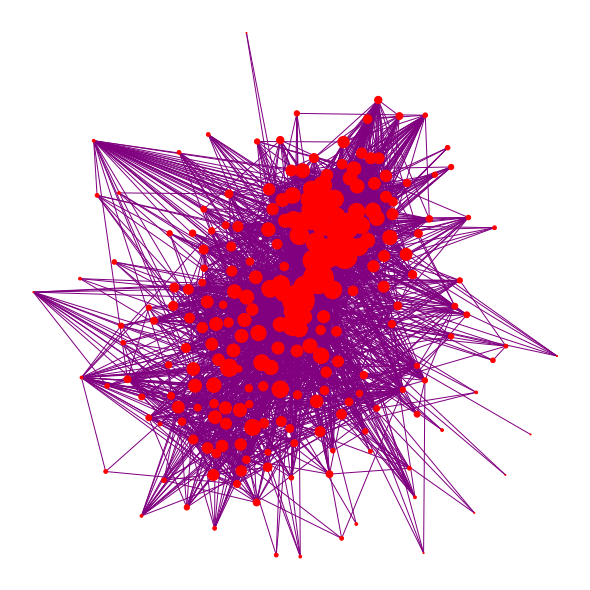

In [12]:
#Your answer here
pos = nx.spring_layout(G)

node_color = 'red'
edge_color = 'purple'
background_color = 'black'
edge_width = 1
size_min = 1
size_max = 1000

#define parameters for linear interpolation of node size from out-degree
dmax = df_degree_2.out_degree.max()
dmin = df_degree_2.out_degree.min()
slope = (size_max-size_min)/(dmax-dmin)
intercept = size_min-slope*dmin

#Go through each node and calculate its size
node_size = [G.out_degree(node)*slope+intercept  for node in G.nodes()]

fig = plt.figure(figsize=(8,8))
nx.draw(G.to_undirected(), pos, node_color = node_color, width= edge_width,edge_color=edge_color,node_size=node_size)